# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [2]:
# make_regression로 데이터 생성
X, y = make_regression(n_samples=1000, noise=0.1, random_state=42, bias=0.5)

# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


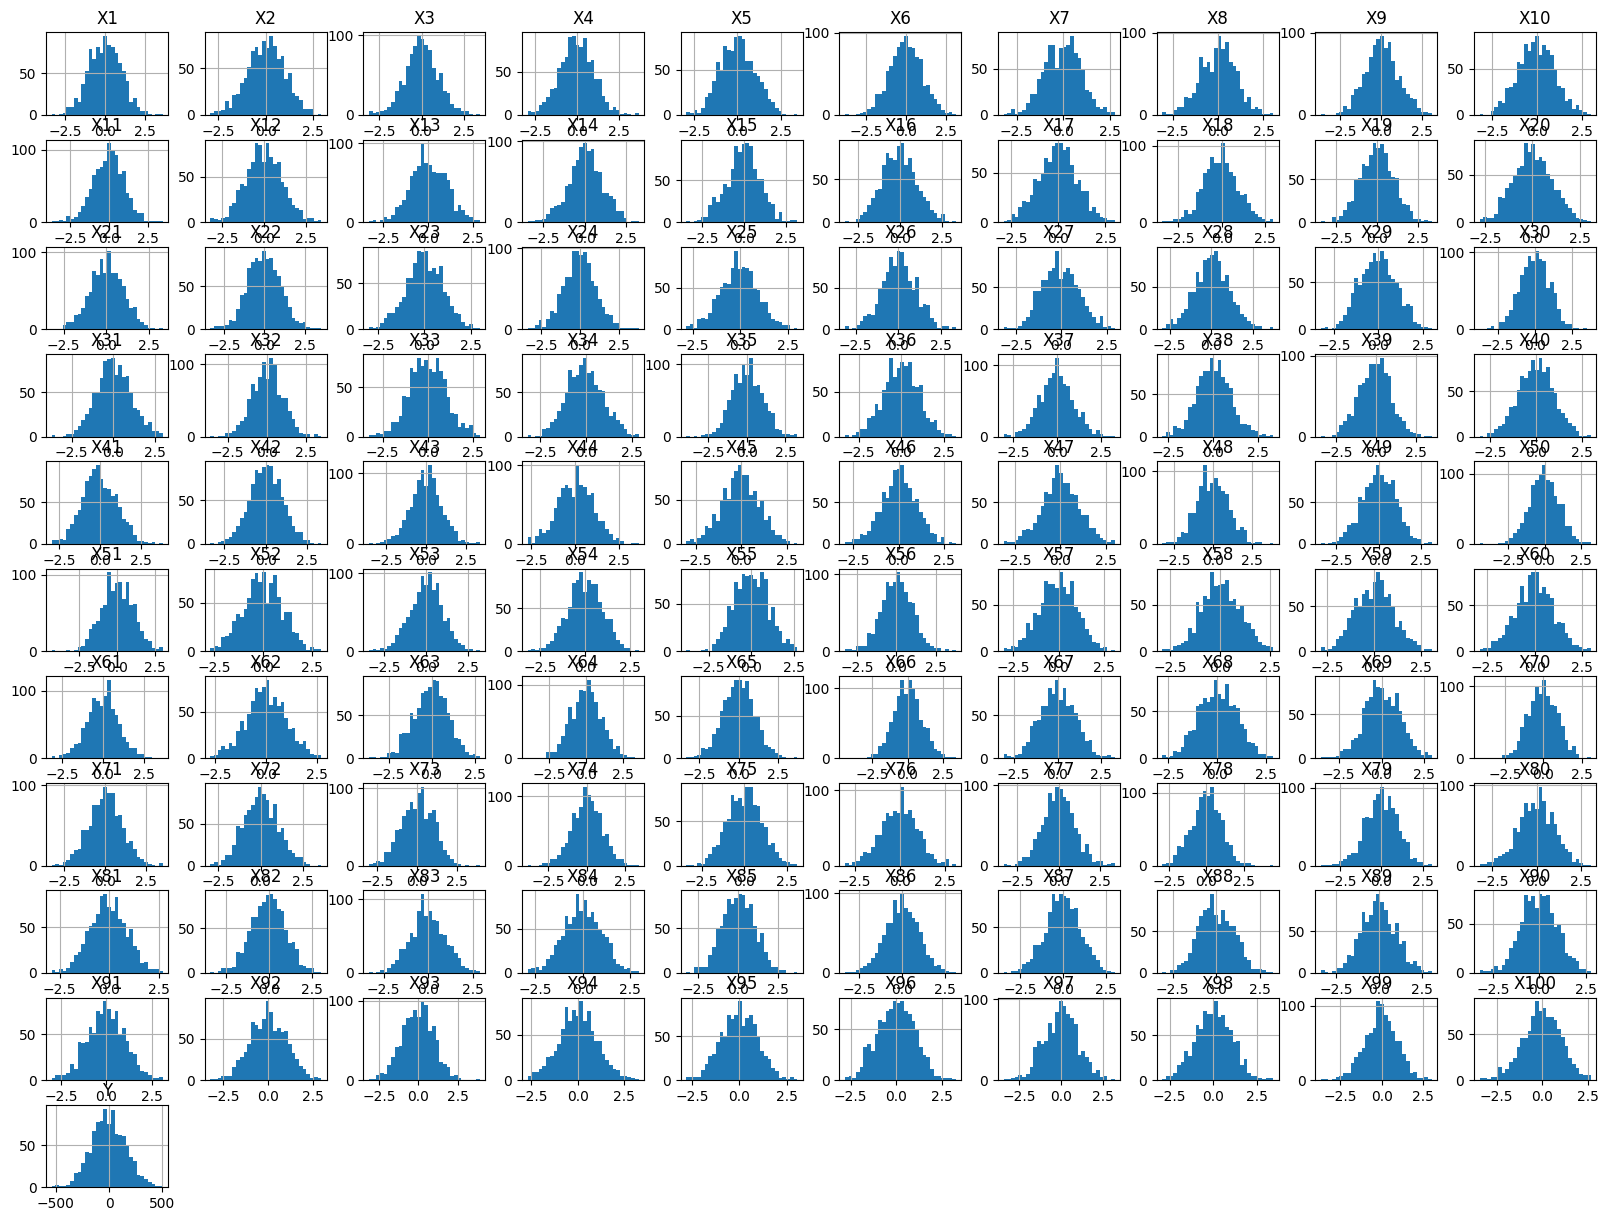

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7978c7c753f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7978c7c74670> (for post_execute):


KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
df['Y'] = y

# 히스토그램
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Scatterplot matrix
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# 요약 통계량
print(df.describe())

# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 스케일링하기


# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

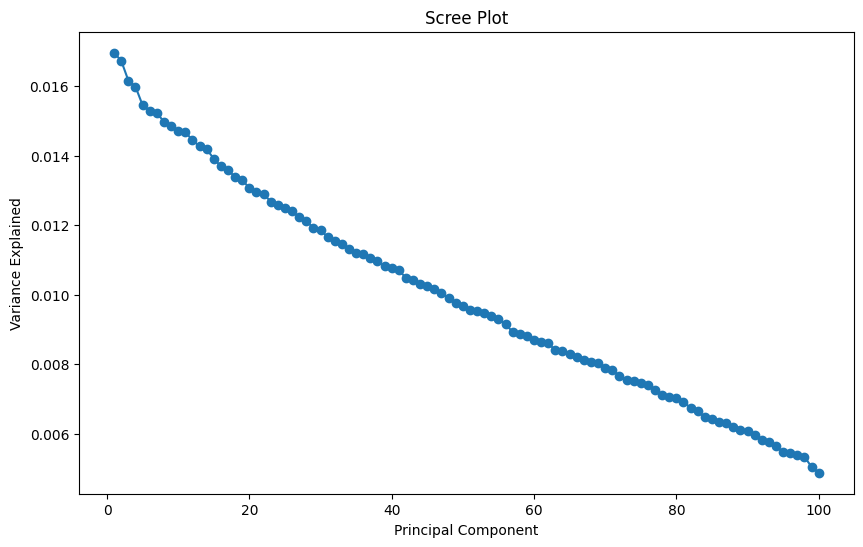

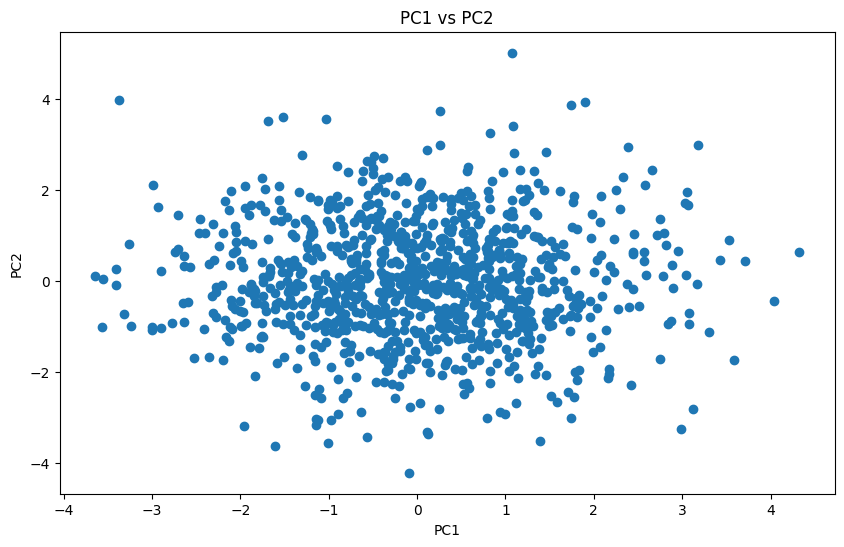

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# PCA 계산하기
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# PC1 와 PC2 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [7]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)


#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []

# 회귀모형 적합
for i in range(1, 11):
    X_train_subset = X_train[:, :i]
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    y_train_pred = model.predict(X_train_subset)
    mse_train.append(mean_squared_error(y_train, y_train_pred))

# 결과 출력
for i, mse in enumerate(mse_train, 1):
    print(f'PC1 to PC{i} train MSE: {mse:.4f}')


PC1 to PC1 train MSE: 23619.6781
PC1 to PC2 train MSE: 23600.9018
PC1 to PC3 train MSE: 21996.1606
PC1 to PC4 train MSE: 21994.1021
PC1 to PC5 train MSE: 21722.5499
PC1 to PC6 train MSE: 21334.8598
PC1 to PC7 train MSE: 21215.3205
PC1 to PC8 train MSE: 21208.8303
PC1 to PC9 train MSE: 21057.5580
PC1 to PC10 train MSE: 20836.8848


# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

In [13]:
# test MSE 저장
mse_test = []

# 회귀모형 적합 및 test MSE 계산
for i in range(1, 11):
    X_train_subset = X_train[:, :i]
    X_test_subset = X_test[:, :i]

    # 새로운 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # 테스트 데이터로 예측
    y_test_pred = model.predict(X_test_subset)
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# 결과 출력 (test MSE)
for i, mse in enumerate(mse_test, 1):
    print(f'PC1 to PC{i} test MSE: {mse:.4f}')

PC1 to PC1 test MSE: 29728.0533
PC1 to PC2 test MSE: 29793.4920
PC1 to PC3 test MSE: 27305.1148
PC1 to PC4 test MSE: 27309.0429
PC1 to PC5 test MSE: 26774.4275
PC1 to PC6 test MSE: 26536.9203
PC1 to PC7 test MSE: 26781.1310
PC1 to PC8 test MSE: 26779.3630
PC1 to PC9 test MSE: 26872.6002
PC1 to PC10 test MSE: 26077.3516
